In [1]:
from abc import ABC, abstractmethod

In [2]:
from dataclasses import dataclass
import dataclasses

In [3]:
from typing import (Generic, TypeVar, 
                    Sequence, Callable)

In [4]:
from random import randint

In [5]:
import statistics

In [93]:
A = TypeVar("A")

In [94]:
class Distribution(ABC, Generic[A]):
    @abstractmethod
    def sample(self) -> A:
        pass
    
    def sample_n(self, n: int) -> Sequence[A]:
        return [self.sample() for _ in range(n)]

In [95]:
import random
class Die(Distribution[int]):
    def __init__(self, sides):
        self.sides = sides
    def sample(self):
        return random.randint(1, self.sides)
    def __repr__(self):
        return f"Die(sides={self.sides})"
    def __eq__(self, other):
        if isinstance(other, Die):
            return self.sides == other.sides

six_sided = Die(6)
def roll_dice():
    return six_sided.sample() + six_sided.sample()

In [96]:
Die(6) == Die(6)

True

In [97]:
Die(6) == None

In [98]:
@dataclass(frozen = True)
class Die(Distribution):
    sides: int
    
    def sample(self) -> int:
        return random.randint(1, self.sides)

In [99]:
d = Die(6)
d.sides

6

In [104]:
d6  = Die(6)
d20 = dataclasses.replace(d6, sides = 20)

In [105]:
{d6: "abs"}

{Die(sides=6): 'abs'}

In [106]:
def expected_value(d: Distribution[float], n: int = 100) -> float:
    return statistics.mean(d.sample() for _ in range(n))

In [107]:
samples = distribution.sample_n(100)

NameError: name 'distribution' is not defined

In [108]:
import numpy as np

In [109]:
@dataclass
class Gaussian(Distribution[float]):
    μ: float
    σ: float
    
    def sample(self) -> float:
        return np.random.normal(loc   = self.μ, 
                                scale = self.σ)
    
    def sample_n(self, n: int) -> Sequence[float]:
        return np.random.normal(loc   = self.μ,
                                scale = self.σ,
                                size  = n)

In [115]:
import timeit

In [116]:
d = Gaussian(μ = 0, σ = 1)

In [117]:
timeit.timeit(lambda: [d.sample() for _ in range(100)])

86.40327654103749

In [118]:
timeit.timeit(lambda: d.sample_n(100))

3.5806342910509557

In [119]:
from __future__ import annotations

In [120]:
# class methods are used to model behavior

In [124]:
def repeat(action: Callable[[int, str], [bool]], n: int):
    for _ in range(n):
        action()

In [125]:
def expected_value(
    d: Distribution[A],
    f: Callable[[A], float],
    n: int
) -> float:
    return statistics.mean(f(d.sample()) for _ in range(n))

In [126]:
def payoff(coin: Coin) -> float:
    return 1.0 if coin == "heads" else 0.0

In [168]:
@dataclass(frozen=True)
class Coin(Distribution[str]):
    def sample():
        return "heads" if random.random() < 0.5 else "tails"

In [169]:
c = Coin

In [178]:
coin_flip = c.sample()

In [179]:
payoff(coin_flip)

1.0

In [192]:
expected_value(d = c, f = payoff, n = 100)

0.44

In [208]:
expected_value(d = c, f = lambda coin: 1.0 if coin == "heads" else 0.0, n = 10)

0.5

In [217]:
def sqrt(a: float, threshold: float) -> float:
    x   = a / 2 # initial guess
    x_n = a
    while abs(x_n - x) > threshold:
        x   = x_n
        x_n = (x + (a / x_n)) / 2
    return x_n

In [218]:
print(sqrt(a = 55, threshold = 0.01))

7.416198913250979


In [221]:
for x in range(3): print(x)

0
1
2


In [222]:
def sqrt(a: float) -> Iterator[float]:
    x = a / 2 # initial guess
    while True:
        x = (x + (a / x)) / 2
        yield x

In [223]:
import itertools

In [228]:
iterations = list(itertools.islice(sqrt(25), 10))
iterations[0:5]

[7.25,
 5.349137931034482,
 5.011394106532552,
 5.000012953048684,
 5.000000000016778]

In [229]:
def converge(values:    Iterator[float], 
             threshold: float
            ) -> Iterator[float]:
    for a, b in itertools.pairwise(values):
        yield a
        
        if abs(a - b) < threshold:
            break

In [234]:
results = converge(sqrt(25), 0.001)
capped_results = itertools.islice(results, 10000)

In [236]:
list(capped_results)

[7.25, 5.349137931034482, 5.011394106532552, 5.000012953048684]

# Chapter 3

In [239]:
import numpy as np
from dataclasses import dataclass

In [242]:
@dataclass
class Process1:
    @dataclass
    class State:
        price: int
    
    level_param: int
    alpha1:      float
    
    def up_prob(self, state: State) -> float:
        return 1. / (1 + np.exp(-self.alpha1 * (self.level_param - state.price)))
    
    def next_state(self, state: State) -> State:
        up_move: int = np.random.binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price = state.price + up_move * 2 - 1)

In [243]:
def simulation(process, start_state):
    start = start_state
    while True:
        yield state
        state = process.next_state(state)

In [244]:
import itertools

In [245]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1:      float,
    time_steps:  int,
    num_traces:  int
) -> np.ndarray:
    process = Process1(level_param = level_param, alpha1 = alpha1)
    start_state = Process1.State(price = start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [246]:
from dataclasses import dataclass
from typing import Optional, Mapping, Sequence, Tuple
from collections import Counter
import numpy as np
from numpy.random import binomial
import itertools
from operator import itemgetter
from rl.gen_utils.common_funcs import get_logistic_func, get_unit_sigmoid_func

In [247]:
@dataclass
class Process1:
    @dataclass
    class State:
        price: int

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: State) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process1.State(price=state.price + up_move * 2 - 1)

In [248]:
handy_map: Mapping[Optional[bool], int] = {True: -1, False: 1, None: 0}

In [250]:
@dataclass
class Process2:
    @dataclass
    class State:
        price: int
        is_prev_move_up: Optional[bool]

    alpha2: float = 0.75  # strength of reverse-pull (value in [0,1])

    def up_prob(self, state: State) -> float:
        return 0.5 * (1 + self.alpha2 * handy_map[state.is_prev_move_up])

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process2.State(
            price=state.price + up_move * 2 - 1,
            is_prev_move_up=bool(up_move)
        )

In [251]:
@dataclass
class Process3:
    @dataclass
    class State:
        num_up_moves: int
        num_down_moves: int

    alpha3: float = 1.0  # strength of reverse-pull (non-negative value)

    def up_prob(self, state: State) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(
            state.num_down_moves / total
        ) if total else 0.5

    def next_state(self, state: State) -> State:
        up_move: int = binomial(1, self.up_prob(state), 1)[0]
        return Process3.State(
            num_up_moves=state.num_up_moves + up_move,
            num_down_moves=state.num_down_moves + 1 - up_move
        )

In [252]:
def simulation(process, start_state):
    state = start_state
    while True:
        yield state
        state = process.next_state(state)

In [253]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process1(level_param=level_param, alpha1=alpha1)
    start_state = Process1.State(price=start_price)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [254]:
def process2_price_traces(
    start_price: int,
    alpha2: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    process = Process2(alpha2=alpha2)
    start_state = Process2.State(price=start_price, is_prev_move_up=None)
    return np.vstack([
        np.fromiter((s.price for s in itertools.islice(
            simulation(process, start_state),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [255]:
def process3_price_traces(
    start_price: int,
    alpha3:      float,
    time_steps:  int,
    num_traces:  int
) -> np.ndarray:
    process = Process3(alpha3=alpha3)
    start_state = Process3.State(num_up_moves=0, num_down_moves=0)
    return np.vstack([
        np.fromiter((start_price + s.num_up_moves - s.num_down_moves
                    for s in itertools.islice(simulation(process, start_state),
                                              time_steps + 1)), float)
        for _ in range(num_traces)])

In [256]:
def plot_single_trace_all_processes(
    process1_trace: np.ndarray,
    process2_trace: np.ndarray,
    process3_trace: np.ndarray
) -> None:

    from rl.gen_utils.plot_funcs import plot_list_of_curves

    traces_len: int = len(process1_trace)

    plot_list_of_curves(
        [range(traces_len)] * 3,
        [process1_trace, process2_trace, process3_trace],
        ["r-", "b--", "g-."],
        [
            r"Process 1 ($\alpha_1=0.25$)",
            r"Process 2 ($\alpha_2=0.75$)",
            r"Process 3 ($\alpha_3=1.0$)"
        ],
        "Time Steps",
        "Stock Price",
        "Single-Trace Simulation for Each Process"
    )

In [258]:
def get_terminal_histogram(
    price_traces: np.ndarray
) -> Tuple[Sequence[int], Sequence[int]]:
    pairs: Sequence[Tuple[int, int]] = sorted(
        list(Counter(price_traces[:, -1]).items()),
        key=itemgetter(0)
    )
    return [x for x, _ in pairs], [y for _, y in pairs]

In [259]:
def plot_distribution_at_time_all_processes(
    process1_traces: np.ndarray,
    process2_traces: np.ndarray,
    process3_traces: np.ndarray
) -> None:

    from rl.gen_utils.plot_funcs import plot_list_of_curves

    num_traces: int = len(process1_traces)
    time_steps: int = len(process1_traces[0]) - 1

    x1, y1 = get_terminal_histogram(process1_traces)
    x2, y2 = get_terminal_histogram(process2_traces)
    x3, y3 = get_terminal_histogram(process3_traces)

    plot_list_of_curves(
        [x1, x2, x3],
        [y1, y2, y3],
        ["r-", "b--", "g-."],
        [
            r"Process 1 ($\alpha_1=0.25$)",
            r"Process 2 ($\alpha_2=0.75$)",
            r"Process 3 ($\alpha_3=1.0$)"
        ],
        "Terminal Stock Price",
        "Counts",
        f"Terminal Price Counts (T={time_steps:d}, Traces={num_traces:d})"
    )

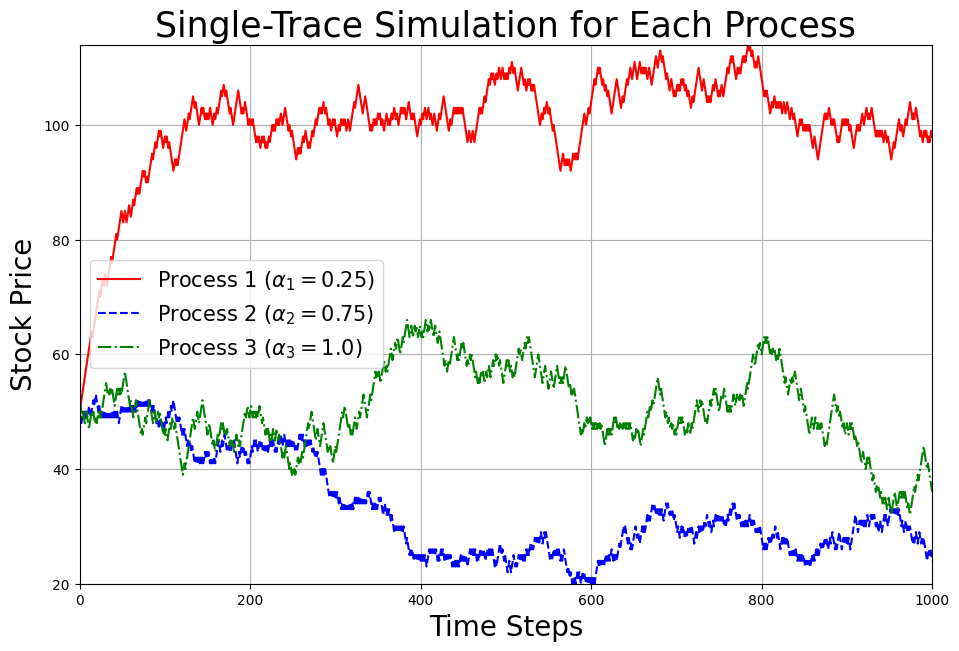

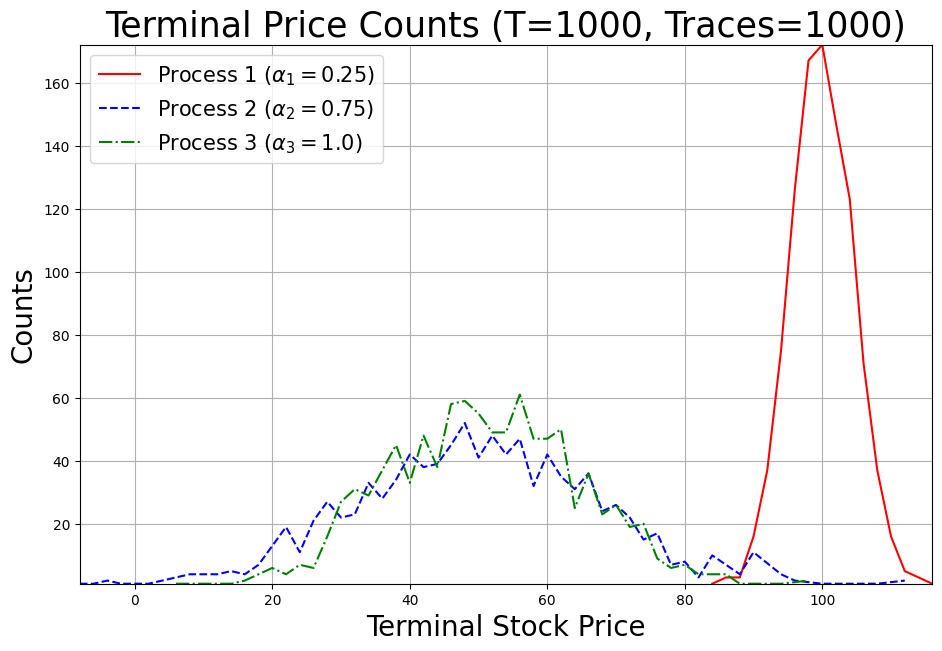

In [264]:
if __name__ == '__main__':
    start_price: int = 50
    level_param: int = 100
    alpha1: float = 0.05
    alpha2: float = 0.5
    alpha3: float = 2.0
    time_steps: int = 1000
    num_traces: int = 1000

    process1_traces: np.ndarray = process1_price_traces(
        start_price=start_price,
        level_param=level_param,
        alpha1=alpha1,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process2_traces: np.ndarray = process2_price_traces(
        start_price=start_price,
        alpha2=alpha2,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process3_traces: np.ndarray = process3_price_traces(
        start_price=start_price,
        alpha3=alpha3,
        time_steps=time_steps,
        num_traces=num_traces
    )

    trace1 = process1_traces[0]
    trace2 = process2_traces[0]
    trace3 = process3_traces[0]

    plot_single_trace_all_processes(trace1, trace2, trace3)

    plot_distribution_at_time_all_processes(
        process1_traces,
        process2_traces,
        process3_traces
    )

## 3.3.3 Markov Process Implementation

In [31]:
from abc import ABC
from dataclasses import dataclass
from typing import Generic, Callable, TypeVar, Iterable
from rl.distribution import Distribution

In [32]:
S = TypeVar('S')
X = TypeVar('X')

In [33]:
class State(ABC, Generic[S]):
    state: S
    
    def on_non_terminal(
        self, 
        f: Callable[[NonTerminal[S]], X],
        default: X
    ) -> X:
        if isinstance(self, NonTerminal):
            return f(self)
        else:
            return default

In [34]:
@dataclass(frozen = True)
class Terminal(State[S]):
    state: S

@dataclass(frozen = True)
class NonTerminal(State[S]):
    state: S

In [35]:
class MarkovProcess(ABC, Generic[S]):
    @abstractmethod
    def transition(self, state: NonTerminal[S]) -> Distribution[State[S]]:
        pass
    
    def simulate(
        self,
        start_state_distribution: Distribution[NonTerminal[S]]
    ) -> Iterable[State[S]]:
        state: State[S] = start_state_distribution.sample()
        yield state
        
        while isinstance(state, NonTerminal):
            state = self.transition(state).sample()
            yield state

In [36]:
from rl.distribution import Categorical
from rl.gen_utils.common_funcs import get_unit_sigmoid_func

In [37]:
@dataclass
class StateMP3:
    num_up_moves:   int
    num_down_moves: int

In [38]:
@dataclass
class StockPriceMP3(MarkovProcess[StateMP3]):
    
    alpha3: float = 1.0 
    
    def up_prob(self, state: StateMP3) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(state.num_down_moves / total
        ) if total else 0.5
    
    def transition(
        self,
        state: NonTerminal[StateMP3]
    ) -> Categorical[State[StateMP3]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP3(
                state.state.num_up_moves + 1, state.state.num_down_moves
            )): up_p,
            NonTerminal(StateMP3(
                state.state.num_up_moves, state.state.num_down_moves + 1
            )): 1 - up_p
        })

In [39]:
from rl.distribution import Constant
import numpy as np

In [40]:
def process3_price_traces(
    start_price: int,
    alpha3: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP3(alpha3=alpha3)
    start_state_distribution = Constant(
        NonTerminal(StateMP3(num_up_moves=0, num_down_moves=0))
    )
    return np.vstack([np.fromiter(
        (start_price + s.state.num_up_moves - s.state.num_down_moves for s in
        itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )),
        float
    ) for _ in range(num_traces)])

## Code Import

In [41]:
from dataclasses import dataclass
from typing import Optional, Mapping
import numpy as np
import itertools
from rl.distribution import Categorical, Constant, FiniteDistribution
from rl.markov_process import MarkovProcess, NonTerminal, State
from rl.gen_utils.common_funcs import get_logistic_func, get_unit_sigmoid_func
from rl.chapter2.stock_price_simulations import\
    plot_single_trace_all_processes
from rl.chapter2.stock_price_simulations import\
    plot_distribution_at_time_all_processes

In [42]:
@dataclass(frozen=True)
class StateMP1:
    price: int

In [43]:
@dataclass
class StockPriceMP1(MarkovProcess[StateMP1]):

    level_param: int  # level to which price mean-reverts
    alpha1: float = 0.25  # strength of mean-reversion (non-negative value)

    def up_prob(self, state: StateMP1) -> float:
        return get_logistic_func(self.alpha1)(self.level_param - state.price)

    def transition(
        self,
        state: NonTerminal[StateMP1]
    ) -> Categorical[State[StateMP1]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP1(state.state.price + 1)): up_p,
            NonTerminal(StateMP1(state.state.price - 1)): 1 - up_p
        })

In [44]:
@dataclass(frozen=True)
class StateMP2:
    price: int
    is_prev_move_up: Optional[bool]

In [45]:
handy_map: Mapping[Optional[bool], int] = {True: -1, False: 1, None: 0}

In [46]:
@dataclass
class StockPriceMP2(MarkovProcess[StateMP2]):

    alpha2: float = 0.75  # strength of reverse-pull (value in [0,1])

    def up_prob(self, state: StateMP2) -> float:
        return 0.5 * (1 + self.alpha2 * handy_map[state.is_prev_move_up])

    def transition(
        self,
        state: NonTerminal[StateMP2]
    ) -> Categorical[State[StateMP2]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP2(state.state.price + 1, True)): up_p,
            NonTerminal(StateMP2(state.state.price - 1, False)): 1 - up_p
        })

In [47]:
@dataclass(frozen=True)
class StateMP3:
    num_up_moves: int
    num_down_moves: int

In [48]:
@dataclass
class StockPriceMP3(MarkovProcess[StateMP3]):

    alpha3: float = 1.0  # strength of reverse-pull (non-negative value)

    def up_prob(self, state: StateMP3) -> float:
        total = state.num_up_moves + state.num_down_moves
        return get_unit_sigmoid_func(self.alpha3)(
            state.num_down_moves / total
        ) if total else 0.5

    def transition(
        self,
        state: NonTerminal[StateMP3]
    ) -> Categorical[State[StateMP3]]:
        up_p = self.up_prob(state.state)
        return Categorical({
            NonTerminal(StateMP3(
                state.state.num_up_moves + 1, state.state.num_down_moves
            )): up_p,
            NonTerminal(StateMP3(
                state.state.num_up_moves, state.state.num_down_moves + 1
            )): 1 - up_p
        })

In [49]:
def process1_price_traces(
    start_price: int,
    level_param: int,
    alpha1: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP1(level_param=level_param, alpha1=alpha1)
    start_state_distribution = Constant(
        NonTerminal(StateMP1(price=start_price))
    )
    return np.vstack([
        np.fromiter((s.state.price for s in itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [50]:
def process2_price_traces(
    start_price: int,
    alpha2: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP2(alpha2=alpha2)
    start_state_distribution = Constant(
        NonTerminal(StateMP2(price=start_price, is_prev_move_up=None))
    )
    return np.vstack([
        np.fromiter((s.state.price for s in itertools.islice(
            mp.simulate(start_state_distribution),
            time_steps + 1
        )), float) for _ in range(num_traces)])

In [51]:
def process3_price_traces(
    start_price: int,
    alpha3: float,
    time_steps: int,
    num_traces: int
) -> np.ndarray:
    mp = StockPriceMP3(alpha3=alpha3)
    start_state_distribution = Constant(
        NonTerminal(StateMP3(num_up_moves=0, num_down_moves=0))
    )
    return np.vstack([np.fromiter(
        (start_price + s.state.num_up_moves - s.state.num_down_moves for s in
         itertools.islice(
             mp.simulate(start_state_distribution),
             time_steps + 1
         )),
        float
    ) for _ in range(num_traces)])

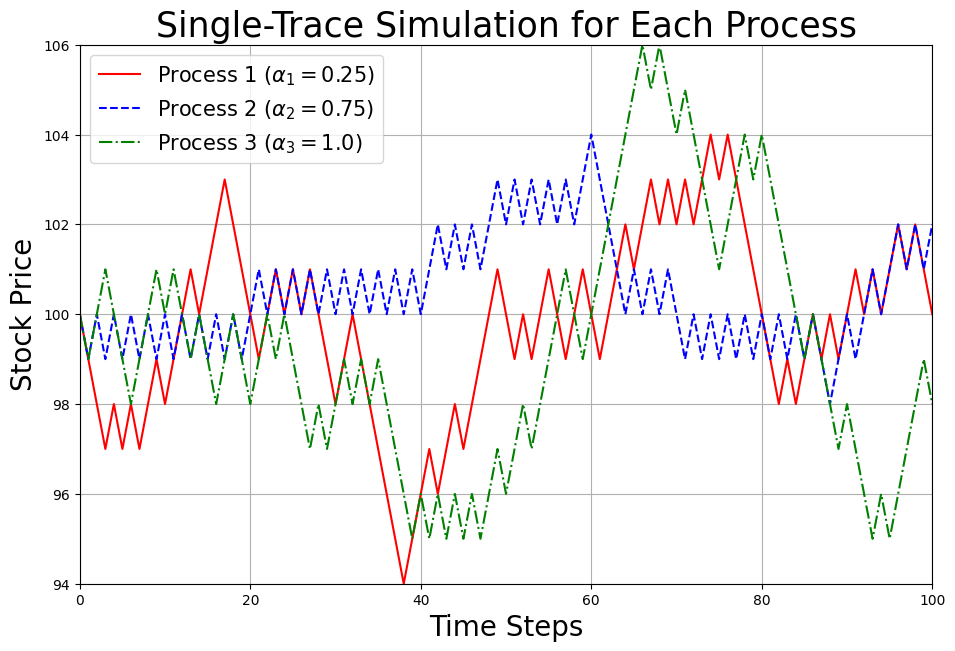

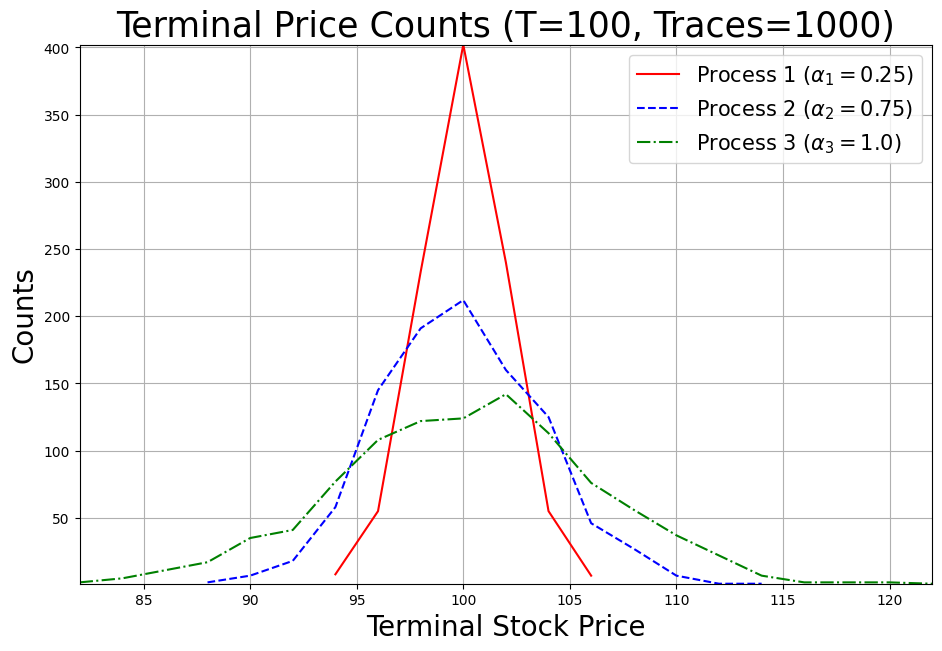

In [52]:
if __name__ == '__main__':
    start_price: int = 100
    level_param: int = 100
    alpha1: float = 0.25
    alpha2: float = 0.75
    alpha3: float = 1.0
    time_steps: int = 100
    num_traces: int = 1000

    process1_traces: np.ndarray = process1_price_traces(
        start_price=start_price,
        level_param=level_param,
        alpha1=alpha1,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process2_traces: np.ndarray = process2_price_traces(
        start_price=start_price,
        alpha2=alpha2,
        time_steps=time_steps,
        num_traces=num_traces
    )
    process3_traces: np.ndarray = process3_price_traces(
        start_price=start_price,
        alpha3=alpha3,
        time_steps=time_steps,
        num_traces=num_traces
    )

    trace1 = process1_traces[0]
    trace2 = process2_traces[0]
    trace3 = process3_traces[0]

    plot_single_trace_all_processes(trace1, trace2, trace3)

    plot_distribution_at_time_all_processes(
        process1_traces,
        process2_traces,
        process3_traces
    )


In [53]:
{
    'Rain' : Categorical({'Rain': 0.3, 'Nice': 0.7}),
    'Snow' : Categorical({'Rain': 0.4, 'Snow': 0.6}),
    'Nice' : Categorical({'Rain': 0.2, 'Snow': 0.3})
}

{'Rain': {'Rain': 0.3, 'Nice': 0.7},
 'Snow': {'Rain': 0.4, 'Snow': 0.6},
 'Nice': {'Rain': 0.4, 'Snow': 0.6}}

In [54]:
Transition = Mapping[NonTerminal[S], FiniteDistribution[State[S]]]
Transition

typing.Mapping[rl.markov_process.NonTerminal[~S], rl.distribution.FiniteDistribution[rl.markov_process.State[~S]]]

In [55]:
class FiniteMarkovProcess(MarkovProcess[S]):
    '''A Markov Process with a finite state space.

    Having a finite state space lets us use tabular methods to work
    with the process (ie dynamic programming).

    '''

    non_terminal_states: Sequence[NonTerminal[S]]
    transition_map: Transition[S]

    def __init__(self, transition_map: Mapping[S, FiniteDistribution[S]]):
        non_terminals: Set[S] = set(transition_map.keys())
        self.transition_map = {
            NonTerminal(s): Categorical(
                {(NonTerminal(s1) if s1 in non_terminals else Terminal(s1)): p
                 for s1, p in v}
            ) for s, v in transition_map.items()
        }
        self.non_terminal_states = list(self.transition_map.keys())

    def __repr__(self) -> str:
        display = ""

        for s, d in self.transition_map.items():
            display += f"From State {s.state}:\n"
            for s1, p in d:
                opt = "Terminal " if isinstance(s1, Terminal) else ""
                display += f"  To {opt}State {s1.state} with Probability {p:.3f}\n"

        return display

    def get_transition_matrix(self) -> np.ndarray:
        sz = len(self.non_terminal_states)
        mat = np.zeros((sz, sz))

        for i, s1 in enumerate(self.non_terminal_states):
            for j, s2 in enumerate(self.non_terminal_states):
                mat[i, j] = self.transition(s1).probability(s2)

        return mat

    def transition(self, state: NonTerminal[S])\
            -> FiniteDistribution[State[S]]:
        return self.transition_map[state]

    def get_stationary_distribution(self) -> FiniteDistribution[S]:
        eig_vals, eig_vecs = np.linalg.eig(self.get_transition_matrix().T)
        index_of_first_unit_eig_val = np.where(
            np.abs(eig_vals - 1) < 1e-8)[0][0]
        eig_vec_of_unit_eig_val = np.real(
            eig_vecs[:, index_of_first_unit_eig_val])
        return Categorical({
            self.non_terminal_states[i].state: ev
            for i, ev in enumerate(eig_vec_of_unit_eig_val /
                                   sum(eig_vec_of_unit_eig_val))
        })

    def display_stationary_distribution(self):
        print({
            s: round(p, 3)
            for s, p in self.get_stationary_distribution()
        })

    def generate_image(self) -> graphviz.Digraph:
        d = graphviz.Digraph()

        for s in self.transition_map.keys():
            d.node(str(s))

        for s, v in self.transition_map.items():
            for s1, p in v:
                d.edge(str(s), str(s1), label=str(p))

        return d

In [56]:
from scipy.stats import poisson

In [57]:
@dataclass(frozen=True)
class InventoryState:
    on_hand: int
    on_order: int

    def inventory_position(self) -> int:
        return self.on_hand + self.on_order

In [58]:
import graphviz

In [59]:
class SimpleInventoryMPFinite(FiniteMarkovProcess[InventoryState]):

    def __init__(
        self,
        capacity: int,
        poisson_lambda: float
    ):
        self.capacity: int = capacity
        self.poisson_lambda: float = poisson_lambda

        self.poisson_distr = poisson(poisson_lambda)
        super().__init__(self.get_transition_map())

    def get_transition_map(self) -> \
            Mapping[InventoryState, FiniteDistribution[InventoryState]]:
        d: Dict[InventoryState, Categorical[InventoryState]] = {}
        for alpha in range(self.capacity + 1):
            for beta in range(self.capacity + 1 - alpha):
                state = InventoryState(alpha, beta)
                ip = state.inventory_position()
                beta1 = self.capacity - ip
                state_probs_map: Mapping[InventoryState, float] = {
                    InventoryState(ip - i, beta1):
                    (self.poisson_distr.pmf(i) if i < ip else
                     1 - self.poisson_distr.cdf(ip - 1))
                    for i in range(ip + 1)
                }
                d[InventoryState(alpha, beta)] = Categorical(state_probs_map)
        return d

In [60]:
if __name__ == '__main__':
    user_capacity = 2
    user_poisson_lambda = 1.0

    si_mp = SimpleInventoryMPFinite(
        capacity=user_capacity,
        poisson_lambda=user_poisson_lambda
    )

    print("Transition Map")
    print("--------------")
    print(si_mp)

    print("Stationary Distribution")
    print("-----------------------")
    si_mp.display_stationary_distribution()

Transition Map
--------------
From State InventoryState(on_hand=0, on_order=0):
  To State InventoryState(on_hand=0, on_order=2) with Probability 1.000
From State InventoryState(on_hand=0, on_order=1):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=0, on_order=2):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=0) with Probability 0.264
From State InventoryState(on_hand=1, on_order=0):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=1, on_order=1):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368


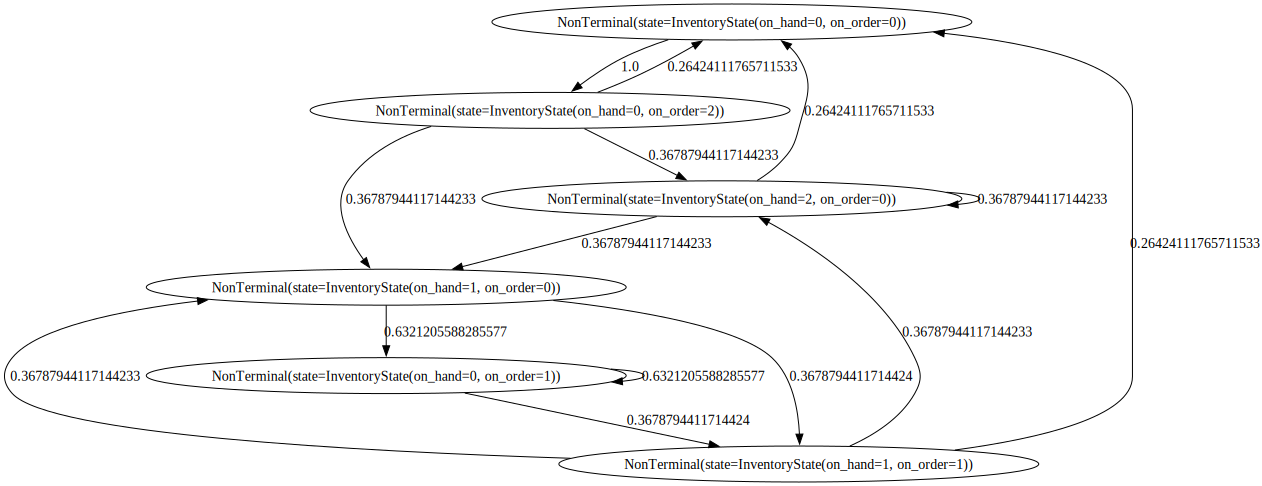

In [61]:
si_mp.generate_image()

## Markov Reward Process

In [67]:
from typing import Tuple

In [70]:
from rl.distribution import Distribution, SampledDistribution

In [68]:
# Reward processes
@dataclass(frozen=True)
class TransitionStep(Generic[S]):
    state: NonTerminal[S]
    next_state: State[S]
    reward: float

In [71]:
class MarkovRewardProcess(MarkovProcess[S]):

    @abstractmethod
    def transition_reward(self, state: NonTerminal[S])\
            -> Distribution[Tuple[State[S], float]]:
        pass
    
    def transition(self, state: NonTerminal[S]) -> Distribution[State[S]]:
        '''Transitions the Markov Reward Process, ignoring the generated
        reward (which makes this just a normal Markov Process).

        '''
        distribution = self.transition_reward(state)
        
        def next_state(distribution=distribution):
            next_s, _ = distribution.sample()
            return next_s

        return SampledDistribution(next_state)

    def simulate_reward(
        self,
        start_state_distribution: Distribution[NonTerminal[S]]
    ) -> Iterable[TransitionStep[S]]:

        state: State[S] = start_state_distribution.sample()
        reward: float = 0.

        while isinstance(state, NonTerminal):
            next_distribution = self.transition_reward(state)

            next_state, reward = next_distribution.sample()
            yield TransitionStep(state, next_state, reward)

            state = next_state

## Inventory Game

In [72]:
from rl.distribution import SampledDistribution
import numpy as np

In [82]:
from collections import defaultdict

In [84]:
from pprint import pprint

In [73]:
@dataclass(frozen=True)
class InventoryState:
    on_hand: int
    on_order: int

    def inventory_position(self) -> int:
        return self.on_hand + self.on_order

In [78]:
StateReward = FiniteDistribution[Tuple[State[S], float]]
RewardTransition = Mapping[NonTerminal[S], StateReward[S]]

In [79]:
class FiniteMarkovRewardProcess(FiniteMarkovProcess[S],
                                MarkovRewardProcess[S]):

    transition_reward_map: RewardTransition[S]
    reward_function_vec: np.ndarray

    def __init__(
        self,
        transition_reward_map: Mapping[S, FiniteDistribution[Tuple[S, float]]]
    ):
        transition_map: Dict[S, FiniteDistribution[S]] = {}

        for state, trans in transition_reward_map.items():
            probabilities: Dict[S, float] = defaultdict(float)
            for (next_state, _), probability in trans:
                probabilities[next_state] += probability

            transition_map[state] = Categorical(probabilities)

        super().__init__(transition_map)

        nt: Set[S] = set(transition_reward_map.keys())
        self.transition_reward_map = {
            NonTerminal(s): Categorical(
                {(NonTerminal(s1) if s1 in nt else Terminal(s1), r): p
                 for (s1, r), p in v}
            ) for s, v in transition_reward_map.items()
        }

        self.reward_function_vec = np.array([
            sum(probability * reward for (_, reward), probability in
                self.transition_reward_map[state])
            for state in self.non_terminal_states
        ])

    def __repr__(self) -> str:
        display = ""
        for s, d in self.transition_reward_map.items():
            display += f"From State {s.state}:\n"
            for (s1, r), p in d:
                opt = "Terminal " if isinstance(s1, Terminal) else ""
                display +=\
                    f"  To [{opt}State {s1.state} and Reward {r:.3f}]"\
                    + f" with Probability {p:.3f}\n"
        return display

    def transition_reward(self, state: NonTerminal[S]) -> StateReward[S]:
        return self.transition_reward_map[state]

    def get_value_function_vec(self, gamma: float) -> np.ndarray:
        return np.linalg.solve(
            np.eye(len(self.non_terminal_states)) -
            gamma * self.get_transition_matrix(),
            self.reward_function_vec
        )

    def display_reward_function(self):
        pprint({
            self.non_terminal_states[i]: round(r, 3)
            for i, r in enumerate(self.reward_function_vec)
        })

    def display_value_function(self, gamma: float):
        pprint({
            self.non_terminal_states[i]: round(v, 3)
            for i, v in enumerate(self.get_value_function_vec(gamma))
        })


In [75]:
class SimpleInventoryMRP(MarkovRewardProcess[InventoryState]):

    def __init__(
        self,
        capacity:       int,
        poisson_lambda: float,
        holding_cost:   float,
        stockout_cost:  float
    ):
        self.capacity              = capacity
        self.poisson_lambda: float = poisson_lambda
        self.holding_cost:   float = holding_cost
        self.stockout_cost:  float = stockout_cost

    def transition_reward(
        self,
        state: NonTerminal[InventoryState]
    ) -> SampledDistribution[Tuple[State[InventoryState], float]]:

        def sample_next_state_reward(state=state) ->\
                Tuple[State[InventoryState], float]:
            demand_sample: int = np.random.poisson(self.poisson_lambda)
            ip: int = state.state.inventory_position()
            next_state: InventoryState = InventoryState(
                max(ip - demand_sample, 0),
                max(self.capacity - ip, 0)
            )
            reward: float = - self.holding_cost * state.state.on_hand\
                - self.stockout_cost * max(demand_sample - ip, 0)
            return NonTerminal(next_state), reward

        return SampledDistribution(sample_next_state_reward)

In [89]:
inv_MRP = SimpleInventoryMRP(
        capacity        = 2,
        poisson_lambda  = 1.0,
        holding_cost    = 0.2,
        stockout_cost   = 0.8
)

In [93]:
start_distrib = Constant(NonTerminal(InventoryState(on_hand = 1, on_order = 11)))

In [123]:
inv_MRP_list = list(itertools.islice(inv_MRP.simulate_reward(start_distrib), 1000))

In [143]:
inv_MRP_rew = {int(next_state_reward.next_state.state.inventory_position()) : [round(next_state_reward.reward,1)] for next_state_reward in inv_MRP_list}


In [144]:
inv_MRP_rew

{12: [-0.2],
 10: [-2.4],
 8: [-2.0],
 7: [-1.4],
 5: [-1.0],
 3: [-1.0],
 2: [-0.2],
 1: [-0.8],
 0: [-0.2]}

In [125]:
inv_MRP_list[0].next_state.state.inventory_position()

12

In [85]:
class SimpleInventoryMRPFinite(FiniteMarkovRewardProcess[InventoryState]):

    def __init__(
        self,
        capacity: int,
        poisson_lambda: float,
        holding_cost: float,
        stockout_cost: float
    ):
        self.capacity: int = capacity
        self.poisson_lambda: float = poisson_lambda
        self.holding_cost: float = holding_cost
        self.stockout_cost: float = stockout_cost

        self.poisson_distr = poisson(poisson_lambda)
        super().__init__(self.get_transition_reward_map())

    def get_transition_reward_map(self) -> \
            Mapping[
                InventoryState,
                FiniteDistribution[Tuple[InventoryState, float]]
            ]:
        d: Dict[InventoryState, Categorical[Tuple[InventoryState, float]]] = {}
        for alpha in range(self.capacity + 1):
            for beta in range(self.capacity + 1 - alpha):
                state = InventoryState(alpha, beta)
                ip = state.inventory_position()
                beta1 = self.capacity - ip
                base_reward = - self.holding_cost * state.on_hand
                sr_probs_map: Dict[Tuple[InventoryState, float], float] =\
                    {(InventoryState(ip - i, beta1), base_reward):
                     self.poisson_distr.pmf(i) for i in range(ip)}
                probability = 1 - self.poisson_distr.cdf(ip - 1)
                reward = base_reward - self.stockout_cost * \
                    (self.poisson_lambda - ip *
                     (1 - self.poisson_distr.pmf(ip) / probability))
                sr_probs_map[(InventoryState(0, beta1), reward)] = probability
                d[state] = Categorical(sr_probs_map)
        return d

In [86]:
if __name__ == '__main__':
    user_capacity = 2
    user_poisson_lambda = 1.0
    user_holding_cost = 1.0
    user_stockout_cost = 10.0

    user_gamma = 0.9

    si_mrp = SimpleInventoryMRPFinite(
        capacity=user_capacity,
        poisson_lambda=user_poisson_lambda,
        holding_cost=user_holding_cost,
        stockout_cost=user_stockout_cost
    )

    from rl.markov_process import FiniteMarkovProcess
    print("Transition Map")
    print("--------------")
    print(FiniteMarkovProcess(
        {s.state: Categorical({s1.state: p for s1, p in v.table().items()})
         for s, v in si_mrp.transition_map.items()}
    ))

    print("Transition Reward Map")
    print("---------------------")
    print(si_mrp)

    print("Stationary Distribution")
    print("-----------------------")
    si_mrp.display_stationary_distribution()
    print()

    print("Reward Function")
    print("---------------")
    si_mrp.display_reward_function()
    print()

    print("Value Function")
    print("--------------")
    si_mrp.display_value_function(gamma=user_gamma)
    print()

Transition Map
--------------
From State InventoryState(on_hand=0, on_order=0):
  To State InventoryState(on_hand=0, on_order=2) with Probability 1.000
From State InventoryState(on_hand=0, on_order=1):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=0, on_order=2):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=0) with Probability 0.264
From State InventoryState(on_hand=1, on_order=0):
  To State InventoryState(on_hand=1, on_order=1) with Probability 0.368
  To State InventoryState(on_hand=0, on_order=1) with Probability 0.632
From State InventoryState(on_hand=1, on_order=1):
  To State InventoryState(on_hand=2, on_order=0) with Probability 0.368
  To State InventoryState(on_hand=1, on_order=0) with Probability 0.368
